## Variance Across Groups Exercises

There are many ways of doing feature reduction/extraction. 
We have seen how correlation between two variables can be used to exclude the features from a model. 
Highly correlated variables contribute less in explaining the variation in data because 
they vary in similar fashion; 
they more or less behave like same features. 
We have seen whether two features are independent or not using chi square test to see if the data in one 
feature is affecting how the data will be in other feature. 
We have seen how PCA tried to compress the data so that maximum variation in data is 
explained using minimal number of dimensions.

The last module tried to explain the variation of data within a feature 
and between features by analyzing variance. 

This technique will help you analyze variables at individual scale how different they are in different groups. Random forests helped determine the importance of variables for fitting the model.

In this exercise, use the techniques of module 8 and the previous modules to predict the forest cover type from the provided data set. 
Some of the exercises are partially complete. 
You have to complete the code or modify the code in order to get the desired output. 
Some of the exercises may be challenging as they might not be directly discussed in the lab or practice notebooks. 
Sufficient guidance and hints are provided for you to look up for the functions or the description is 
provided on how to solve the problem. Use this guidance for answering the questions. 

### Data

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. 
Each observation is a 30m x 30m patch. 
You are asked to predict an integer classification for the forest cover type. 
The seven types are:


#### Forest cover types

* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

#### Data Fields

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* lope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation




#### The wilderness areas are:

* Rawah Wilderness Area
* Neota Wilderness Area
* Comanche Peak Wilderness Area
* Cache la Poudre Wilderness Area

From [kaggle.com](https://www.kaggle.com/c/forest-cover-type-prediction/data)




Load the dataset from 'dsa/data/all_datasets/Forest/forest_cover.csv'

In [123]:
forest_cover = read.csv("/dsa/data/all_datasets/Forest/forest_cover.csv")
head(forest_cover)

Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,⋯,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1,2596,51,3,258,0,510,221,232,148,⋯,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,⋯,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,⋯,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,⋯,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,⋯,0,0,0,0,0,0,0,0,0,5
6,2579,132,6,300,-15,67,230,237,140,⋯,0,0,0,0,0,0,0,0,0,2


In [124]:
str(forest_cover)

'data.frame':	15120 obs. of  56 variables:
 $ Id                                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Elevation                         : int  2596 2590 2804 2785 2595 2579 2606 2605 2617 2612 ...
 $ Aspect                            : int  51 56 139 155 45 132 45 49 45 59 ...
 $ Slope                             : int  3 2 9 18 2 6 7 4 9 10 ...
 $ Horizontal_Distance_To_Hydrology  : int  258 212 268 242 153 300 270 234 240 247 ...
 $ Vertical_Distance_To_Hydrology    : int  0 -6 65 118 -1 -15 5 7 56 11 ...
 $ Horizontal_Distance_To_Roadways   : int  510 390 3180 3090 391 67 633 573 666 636 ...
 $ Hillshade_9am                     : int  221 220 234 238 220 230 222 222 223 228 ...
 $ Hillshade_Noon                    : int  232 235 238 238 234 237 225 230 221 219 ...
 $ Hillshade_3pm                     : int  148 151 135 122 150 140 138 144 133 124 ...
 $ Horizontal_Distance_To_Fire_Points: int  6279 6225 6121 6211 6172 6031 6256 6228 6244 6230 ...
 $ Wilderness_Area1    

The Cover_Type variables has 7 different classes of vegetation. 
Encode the coverType variable to replace the old values (1,2,3,4,5,6,7) with corresponding labels 


* 1.SpruceFir
* 2.LodgepolePine
* 3.PonderosaPine
* 4.Cottonwood-Willow
* 5.Aspen
* 6.Douglas-fir
* 7.Krummholz

Also the columns Wilderness_Area1 through Wilderness_Area4 are mutually exclusive. 
They contain binary values, 1 if the row belongs to certain wilderness type or 0 otherwise. 
Like wise the variables soil_Type1 through soil_Type40 are mutually exclusive containing binary values. 
The column will have a 1 if soil_Type of certain type or 0 otherwise.  

**Activity 1:  ** Encode the Cover_Type variable to replace the old values (1,2,3,4,5,6,7) with corresponding labels using mapvalues() function in plyr package.

In [125]:
# Your code for activity 1 goes here..

require(plyr) # Always load plyr package first if you have to use both plyr and dplyr. Because
              # dplyr package will mask some of the functions in plyr.
require(dplyr)  #Use require as it will give an error message if the package doesn't exist
require(lubridate)

forest_cover$Cover_Type <- mapvalues(forest_cover$Cover_Type, from = c(1,2,3,4,5,6,7), 
to = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"))

In [126]:
head(forest_cover)

Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,⋯,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1,2596,51,3,258,0,510,221,232,148,⋯,0,0,0,0,0,0,0,0,0,5.Aspen
2,2590,56,2,212,-6,390,220,235,151,⋯,0,0,0,0,0,0,0,0,0,5.Aspen
3,2804,139,9,268,65,3180,234,238,135,⋯,0,0,0,0,0,0,0,0,0,2.LodgepolePine
4,2785,155,18,242,118,3090,238,238,122,⋯,0,0,0,0,0,0,0,0,0,2.LodgepolePine
5,2595,45,2,153,-1,391,220,234,150,⋯,0,0,0,0,0,0,0,0,0,5.Aspen
6,2579,132,6,300,-15,67,230,237,140,⋯,0,0,0,0,0,0,0,0,0,2.LodgepolePine


`mapvalues()` with map the values in from i'e 1,2,3... 
to corresponding values in to i'e 1.SpruceFir, 2.LodgepolePine,...

**Reference: **[mapvalues()](https://www.rdocumentation.org/packages/plyr/versions/1.8.4/topics/mapvalues)

In [ ]:
# Run below commands for a quick brief info on the libraries on what they do.

# help(lubridate)
# help(plyr)
# help(dplyr)

**Activity 2: ** Plot a bar graph for the observations of each Cover_Type. 
Use dplyr to first get the count of 7 cover types and normalize the count by dividing it by total rows in forest_cover dataset.

In [127]:
# # Code for activity 2 goes here...

library(ggplot2)

# # forest_cover data is supplied to group_by() function to group the data based on Cover_Type. 
# # This 7 groups of data formed above is supplied as input to summarize() where we are getting the 
# # count of observations stored in the variable count. cover_type_ratio is created to store the 
# # ratio of cover type. 

coverType_count = forest_cover %>%  
  group_by(Cover_Type) %>%    # data is grouped according to labels (1,2,3,4,5,6,7) of cover type
  dplyr::summarize(count = n()) %>%  # count the number of observations in each group
  mutate(cover_type_ratio=count/sum(count)) # divide the counts obtained in above step to get the ratio.
                                           
# # Display the contents of the variable coverType_count
coverType_count

Cover_Type,count,cover_type_ratio
1.SpruceFir,2160,0.1428571
2.LodgepolePine,2160,0.1428571
3.PonderosaPine,2160,0.1428571
4.Cottonwood-Willow,2160,0.1428571
5.Aspen,2160,0.1428571
6.Douglas-fir,2160,0.1428571
7.Krummholz,2160,0.1428571


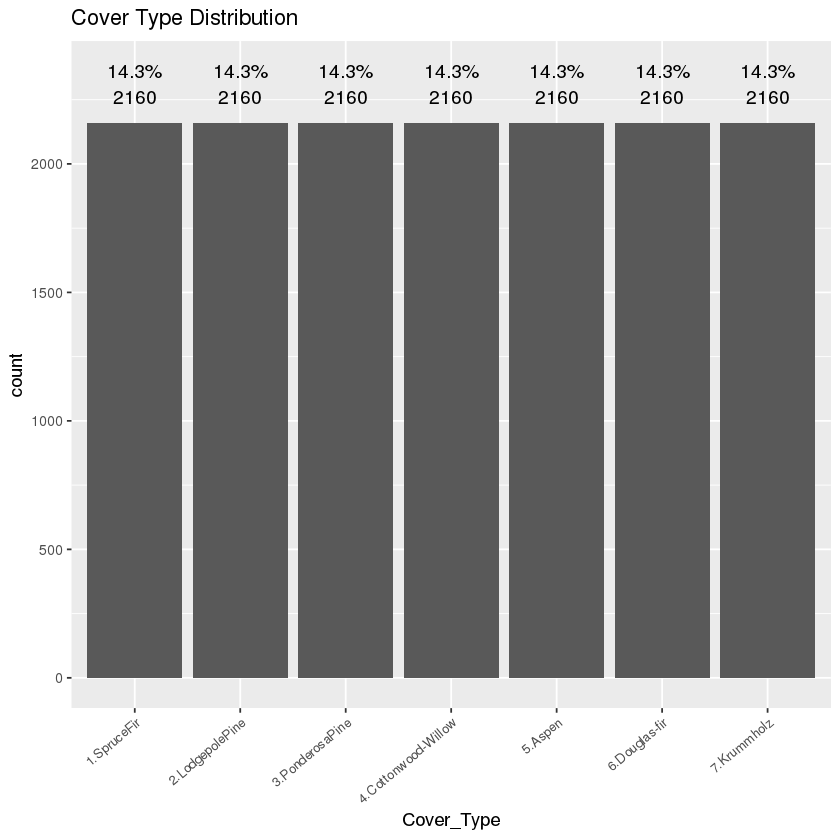

In [128]:
# Code for activity 2 continues here.

# plot the distribution of cover type using the dataframe "coverType_count" created above. 
plot<-ggplot(coverType_count, aes(x=Cover_Type, y=count)) +   
  geom_bar(stat="identity") + # plot a bar graph 
  scale_y_continuous() + 
  geom_text(data=coverType_count, aes(label=count,y=count+100),size=4) + # Display the count for each category 
                    # at y position "count(2160)+100". This will display the value right above the bars.
  geom_text(data=coverType_count, aes(label=scales::percent(cover_type_ratio),y=count+200),size=4) +
                    # Display the count percentage rounded to one decimal place at y position "count(2160)+200". This  
                    # will display the ratios right above the counts printed in previous steps.          

                    # You should convert the ratio 0.1428571 to 14.3% for printing in above step.

  theme(axis.text.x=element_text(angle=40,hjust=1,size=8)) + # code to adjust the indices on x-axis 
                                                            # tilted. Play with the code to see what each parameter is doing.
  ggtitle('Cover Type Distribution')

plot

The forest cover is equally distributed with 7 different types as evident from above plot. 

**Activity 3: ** The names of some of the variables are too long. Modify the column names as listed.

In [129]:
oldnames<-c("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
                  "Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points","Hillshade_9am",
                  "Hillshade_Noon","Hillshade_3pm")

newnames<-c("Elevation","Aspect","Slope","HD.Hydro","VD.Hydro","HD.Road","HD.Fire","HS.9am","HS.noon","HS.3pm")

library(data.table)

# Your code for activity 3 goes here.
setnames(forest_cover, old=oldnames, new=newnames)

In [130]:
head(forest_cover)

Id,Elevation,Aspect,Slope,HD.Hydro,VD.Hydro,HD.Road,HS.9am,HS.noon,HS.3pm,⋯,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1,2596,51,3,258,0,510,221,232,148,⋯,0,0,0,0,0,0,0,0,0,5.Aspen
2,2590,56,2,212,-6,390,220,235,151,⋯,0,0,0,0,0,0,0,0,0,5.Aspen
3,2804,139,9,268,65,3180,234,238,135,⋯,0,0,0,0,0,0,0,0,0,2.LodgepolePine
4,2785,155,18,242,118,3090,238,238,122,⋯,0,0,0,0,0,0,0,0,0,2.LodgepolePine
5,2595,45,2,153,-1,391,220,234,150,⋯,0,0,0,0,0,0,0,0,0,5.Aspen
6,2579,132,6,300,-15,67,230,237,140,⋯,0,0,0,0,0,0,0,0,0,2.LodgepolePine


**Activity 4: **Create box plots for each of the variables listed above in activity 3. 


`Follow the partial code below to complete it`: 

The code may look little dense but its because of the for loop we are running. 
The loop will capture each plot in an array. Ignore the for loop for some time and look at the code inside. It's a regular simple box plot. 

Use aes_string(y=newnames[i],x="Cover_Type") inside ggplot(). 
It means, x axis will be Cover_type and y-axis will be the variable in the list "newnames". 
The for loop will repeat 10 times for the 10 variables in the list to produce 10 box plots. 

$1^{st}$ box plot would be between Elevation and Cover_Type

$2^{st}$ box plot would be between Aspect and Cover_Type and so on

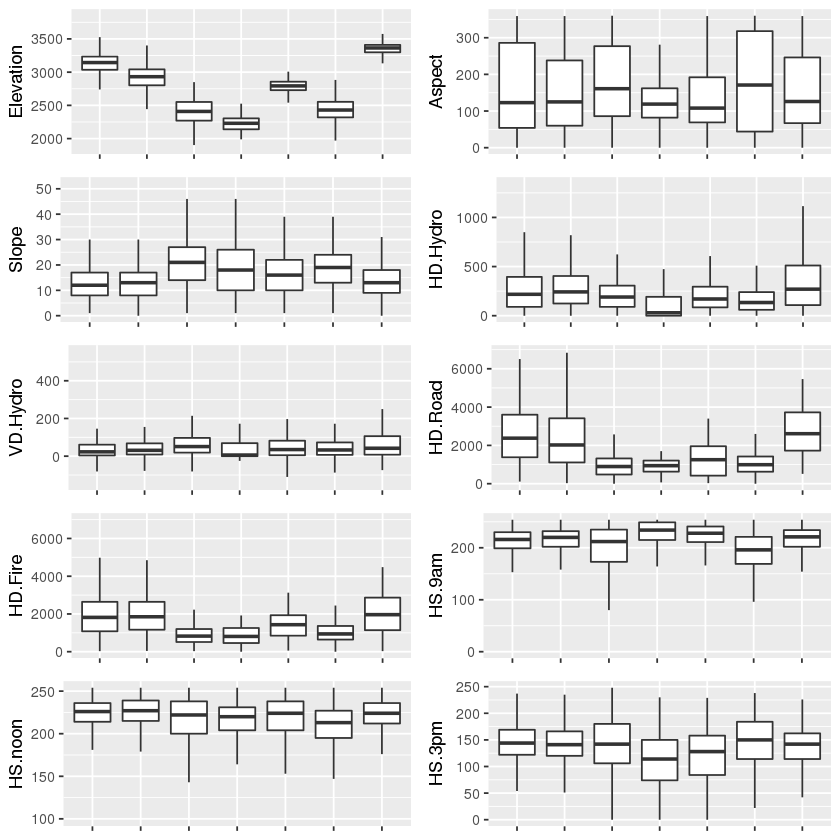

In [131]:
# Your code for activity 4 goes here....

p=list()
for(i in 1:length(newnames)){
  p[[i]] <- ggplot(forest_cover, aes_string(y=newnames[i],x="Cover_Type")) + 
              geom_boxplot(outlier.shape = NA) + 
              theme(axis.text.x=element_blank(),axis.title.x=element_blank()) # This line will keep the
               # x-axis label and title of each plot empty.
  }

# Arrange the plots in a grid using grid.arrange() in grid.Extra package. Arrange 2 plots in a row.
library(gridExtra)
grid.arrange(p[[1]],p[[2]],p[[3]],p[[4]],p[[5]],p[[6]],p[[7]],p[[8]],p[[9]],p[[10]],
    ncol=2) # ncol will arrange two plots in each row.

**Activity 5: ** 
Find correlation between the columns 2 to 10 in forest_cover. 
The first column is ID. So ignore it. The rest of the columns have binary values. 
Use `ggcorr()` function in GGally package. 

**Reference: **[ggcorr()](https://briatte.github.io/ggcorr/)

In [132]:
library(GGally)

In [ ]:
# Run the cell to learn more about the ggcorr() function parameters.
help(ggcorr)

Warning message:
“Ignoring unknown aesthetics: show_guide”

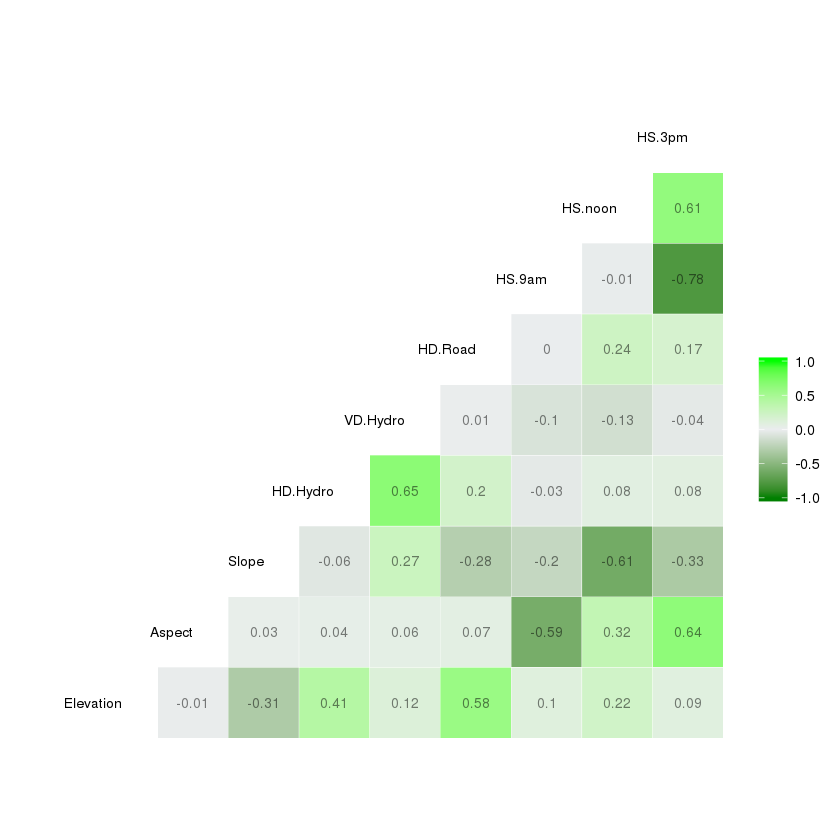

In [135]:
# Your code for activity 5 goes here....

corr_plot<-ggcorr(forest_cover[, 2:10], label = TRUE, label_size = 3, label_round = 2, label_alpha = 0.5,
                 low = "#008000", mid = "#EBEDEF", high = "#00FF00", hjust = 1, size = 3, layout.exp = 1) 
                           # Run help(ggcorr) for documentation
    
# label indicates to add correlation coefficients to the plot.

# label_size indicates size of the correlation coefficients

# label_round : indicates how many decimals the correlation coefficiens should be rounded

# label_alpha: indicates whether the correlation coefficients be made increasingly transparent as they 
# come close to 0. 

# hjust: will adjust the position of labels Elevation , Aspect etc horizontally from the plot. 
# Change the value to 0 and 4 to understand how it works.

# size: indicates size of the labels Elevation, Aspect etc. Change the number to 10 to see how it works.

# layout.exp: Its a multiplier to expand the horizontal axis to the left if variable names get clipped. 


# Plot the correlation plot created above.
corr_plot

--- 

**Activity 6: ** Identify the pairs of variables which have a correlation of greater than 0.5 and less than -0.5 using above correlation plot and draw scatter plots for each pair of variables. 

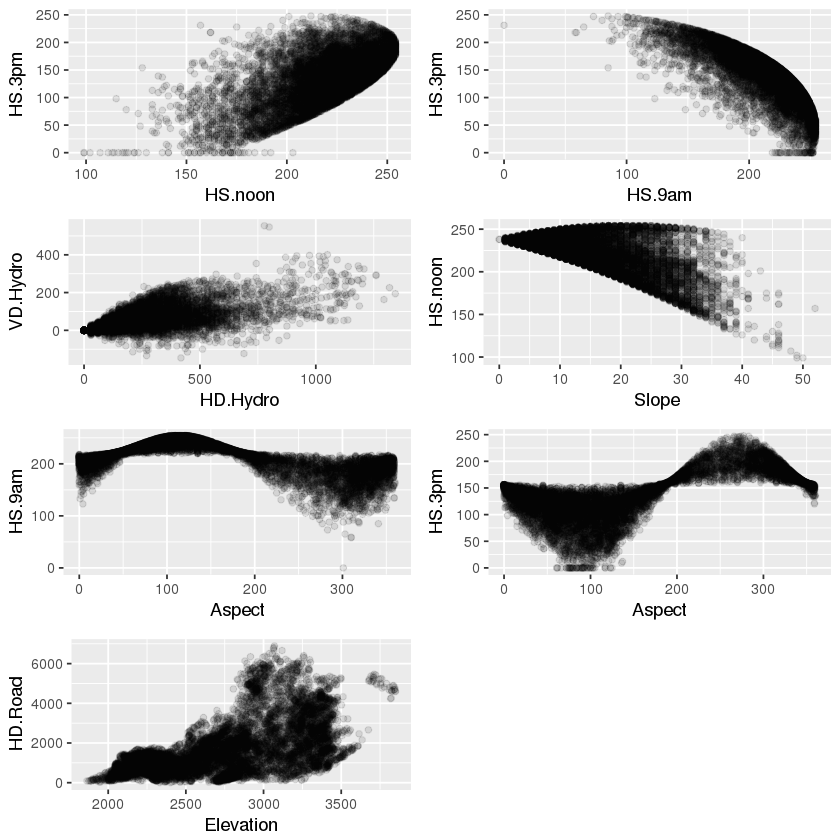

In [136]:
# Your code for activity 6 goes here....

# For example HS.noon is correlated with HS.3pm
corrFeature1<-c("HS.noon","HS.9am","HD.Hydro","Slope","Aspect","Aspect","Elevation") # So you will include HS.noon in this list
corrFeature2<-c("HS.3pm","HS.3pm","VD.Hydro","HS.noon","HS.9am","HS.3pm","HD.Road") # Corresponding feature HS.3pm is included in the list 
                                                                        # in the same position as one to one mapping.

scatterTemp<-sample_n(forest_cover,10000)

p=list()
for(i in 1:length(corrFeature1)){
  p[[i]] <- ggplot(scatterTemp, aes_string(x=corrFeature1[i],y=corrFeature2[i])) +
              geom_point(alpha=1/10)
  }

# Arrange the plots in a grid using grid.arrange() in grid.Extra package. Arrange 2 plots in a row.
library(gridExtra)
grid.arrange(p[[1]],p[[2]],p[[3]],p[[4]],p[[5]],p[[6]],p[[7]],
    ncol=2) # ncol=2 will arrange two plots in each row.


The columns Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4 are mutually exclusive. That means we can fuse these columns into one column. 

Combine the 4 columns listed above into one single column called wildernessArea. Assign the labels Rawah, Neota, ComanchePeak, CachePoudre for each row of wildernessArea where the row belongs to one of the 4 categories.

In [137]:
# Recode the Lables for the "wildernessArea" to one column. 

# Existing column names. These 4 columns have to be fused into one column called wildernessArea
oldCols <- c("Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4")

# New labels that are to be assigned to each row in wildernessArea corresponding to the category 
# of wilderness_Area it belongs
newLabels <- c("Rawah","Neota","ComanchePeak","CachePoudre")

# forest_cover is a dataframe. Convert it into a data.table to assign values using := operator.
forest_cover=data.table(forest_cover)
is.data.table(forest_cover) # make sure forest_cover is a data.table. 

for(i in 1:length(newLabels)) { # Loop for 4 times. length(newLabels) is 4. 
   refColumn<-oldCols[i] # Take the name in vector oldCols according to the loop count. oldCols[1] 
                         # will give Wilderness_Area1.
   refValue<-newLabels[i]  # Take the name in vector newLabels according to the loop count. 
                         # newLabels[1] will give Rawah
    
   forest_cover<-forest_cover[get(refColumn)==1,wildernessArea:=refValue]
}
# get(refColumn) will return the column. For example get(refColumn) returned Wilderness_Area1.
    # Then for every value 1 in Wilderness_Area1, wildernessArea will be assigned the value Rawah.
    
    # Or if get(refColumn) returned Wilderness_Area2.
    # Then for every value 1 in Wilderness_Area2, wildernessArea will be assigned the value Neota. 
    # This will continue for remaining two columns. 
    # Finally one fused column wildernessArea with recoded values Rawah, Neota etc is formed.

[1] TRUE

In [ ]:
# Run the cell to understand how assignment operator(:=) works.
help(":=")

Repeat the same thing for columns Soil_Type1, Soi_Type2 and so on until Soil_Type40. Even these columns are mutually exclusive. That means we can fuse these columns into one column without losing any data. 

Combine the into one single column called soilType. Assign the new labels for each row of soilType where the row belongs to one of the 40 categories.

In [138]:
#Recode the Lables for the "Soil_Type" to one column called soilType. 
newLabels<-c('Cathedral','Vanet','Haploborolis','Ratake','Vanet1','Vanet2','Gothic','Supervisor',
             'Troutville','Bullwark1','Bullwark2','Legault','Catamount1','Pachic','unspecified',
             'Cryaquolis','Gateview','Rogert','Typic1','Typic2','Typic3','Leighcan1','Leighcan2',
             'Leighcan3','Leighcan4','Granile','Leighcan5','Leighcan6','Como1','Como2','Leighcan7',
             'Catamount2','Leighcan8','Cryorthents','Cryumbrepts','Bross','Rock','Leighcan9','Moran1',
             'Moran2')

oldCols <- c("Soil_Type1","Soil_Type2","Soil_Type3","Soil_Type4","Soil_Type5","Soil_Type6","Soil_Type7","Soil_Type8",
"Soil_Type9","Soil_Type10","Soil_Type11","Soil_Type12","Soil_Type13","Soil_Type14","Soil_Type15","Soil_Type16",
"Soil_Type17","Soil_Type18","Soil_Type19","Soil_Type20","Soil_Type21","Soil_Type22","Soil_Type23","Soil_Type24",
"Soil_Type25","Soil_Type26","Soil_Type27","Soil_Type28","Soil_Type29","Soil_Type30","Soil_Type31","Soil_Type32",
"Soil_Type33","Soil_Type34","Soil_Type35","Soil_Type36","Soil_Type37","Soil_Type38","Soil_Type39","Soil_Type40")

# The following code is same as previous cell.
for(i in 1:length(newLabels)) {
   refColumn<-oldCols[i]
   refValue<-newLabels[i]
   forest_cover<-forest_cover[get(refColumn)==1,soilType:=refValue]
}


# Remove the binary columns Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4 and 
# other 40 columns of soil type. These binary column span from 12 through 55 columns. 
# Assign the these columns to NULL to delete them.

forest_cover <- forest_cover[ , colnames(forest_cover[,12:55,with=FALSE]):=NULL]

# In following line of code, colnames(forest_cover[,12:55,with=FALSE]):=NULL all columns 12 through 55 are
# assigned to NULL to delete them.

# with = FALSE, means the columns 12:55 will be a character vector of column names or a numeric vector 
# of column positions to select, and the value returned is always a data.table. 

In [139]:
# Understand the difference between with=TRUE and with=FALSE by looking at the output of the cell. Run help(data.table) to know 
# more about with operator and data.table
temp <- forest_cover[ , colnames(forest_cover[,1:5,with=TRUE])]
dim(temp)

temp <- forest_cover[ , colnames(forest_cover[,1:5,with=FALSE])]
(temp)

NULL

[1] "Id"        "Elevation" "Aspect"    "Slope"     "HD.Hydro"

In [ ]:
# Run the cell to learn more about how data.table is different from dataframe.
help(data.table)

In [140]:
# Run str() to verify Wilderness_Area columns and soil_Type columns are merged and all those binary columns are deleted.
str(forest_cover)

Classes ‘data.table’ and 'data.frame':	15120 obs. of  14 variables:
 $ Id            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Elevation     : int  2596 2590 2804 2785 2595 2579 2606 2605 2617 2612 ...
 $ Aspect        : int  51 56 139 155 45 132 45 49 45 59 ...
 $ Slope         : int  3 2 9 18 2 6 7 4 9 10 ...
 $ HD.Hydro      : int  258 212 268 242 153 300 270 234 240 247 ...
 $ VD.Hydro      : int  0 -6 65 118 -1 -15 5 7 56 11 ...
 $ HD.Road       : int  510 390 3180 3090 391 67 633 573 666 636 ...
 $ HS.9am        : int  221 220 234 238 220 230 222 222 223 228 ...
 $ HS.noon       : int  232 235 238 238 234 237 225 230 221 219 ...
 $ HS.3pm        : int  148 151 135 122 150 140 138 144 133 124 ...
 $ HD.Fire       : int  6279 6225 6121 6211 6172 6031 6256 6228 6244 6230 ...
 $ Cover_Type    : chr  "5.Aspen" "5.Aspen" "2.LodgepolePine" "2.LodgepolePine" ...
 $ wildernessArea: chr  "Rawah" "Rawah" "Rawah" "Rawah" ...
 $ soilType      : chr  "Como1" "Como1" "Legault" "Como2" ...
 - attr(*, "

The forest_cover is ready for fitting a model on it. The binary columns are removed and converted into 
factor types. 

In [141]:
# Use setcolorder() function to reorder the columns in a dataset.
colOrder<-c("Id","Elevation","Aspect","Slope","HD.Hydro","VD.Hydro","HD.Road","HD.Fire","HS.9am","HS.noon","HS.3pm","Cover_Type","wildernessArea","soilType")

# Rearrange the columns of forest_cover according to above order.
setcolorder(forest_cover, colOrder)

# Shorten the names of columns for readability.
setnames(forest_cover,colOrder)

# Remove the Id column from forest_cover.
forest_cover$Id=NULL

In [142]:
str(forest_cover)

Classes ‘data.table’ and 'data.frame':	15120 obs. of  13 variables:
 $ Elevation     : int  2596 2590 2804 2785 2595 2579 2606 2605 2617 2612 ...
 $ Aspect        : int  51 56 139 155 45 132 45 49 45 59 ...
 $ Slope         : int  3 2 9 18 2 6 7 4 9 10 ...
 $ HD.Hydro      : int  258 212 268 242 153 300 270 234 240 247 ...
 $ VD.Hydro      : int  0 -6 65 118 -1 -15 5 7 56 11 ...
 $ HD.Road       : int  510 390 3180 3090 391 67 633 573 666 636 ...
 $ HD.Fire       : int  6279 6225 6121 6211 6172 6031 6256 6228 6244 6230 ...
 $ HS.9am        : int  221 220 234 238 220 230 222 222 223 228 ...
 $ HS.noon       : int  232 235 238 238 234 237 225 230 221 219 ...
 $ HS.3pm        : int  148 151 135 122 150 140 138 144 133 124 ...
 $ Cover_Type    : chr  "5.Aspen" "5.Aspen" "2.LodgepolePine" "2.LodgepolePine" ...
 $ wildernessArea: chr  "Rawah" "Rawah" "Rawah" "Rawah" ...
 $ soilType      : chr  "Como1" "Como1" "Legault" "Como2" ...
 - attr(*, ".internal.selfref")=<externalptr> 


**Reference: **

* [setcolorder()](https://www.rdocumentation.org/packages/data.table/versions/1.9.6/topics/setcolorder) : orders the columns of data.table, by reference, to the new order provided.

* [setnames](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/setNames.html): This is a convenience function that sets the names on an object and returns the object.

---
**Activity 7: ** Calculate feature importance of the variables in forest_cover 
(1) using Random Forest, then 
(2) printing out the variable importance table and 
(3) variable importance plot. 


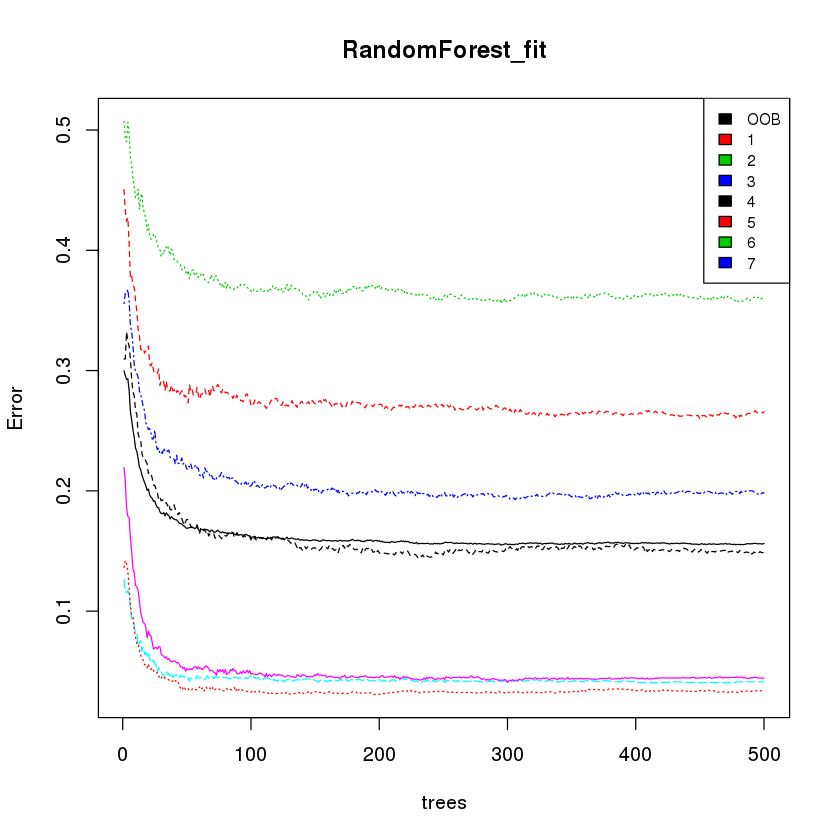

In [143]:
library(randomForest)

forest_cover$Cover_Class <- factor(forest_cover$Cover_Type,
levels = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"),
labels = c(1,2,3,4,5,6,7))

# Your code for activity 7.1 goes here...

RandomForest_fit <- randomForest(Cover_Class ~.-wildernessArea -soilType -Cover_Type,
                                 method="class",
                                 data=forest_cover, importance=TRUE) 

plot(RandomForest_fit)
legend("topright", colnames(RandomForest_fit$err.rate),col=1:4,cex=0.8,fill=1:4)
forest_cover$Cover_Class <- NULL

In [144]:
# Code for activity 7.2 continues here...

importance(RandomForest_fit)


,1,2,3,4,5,6,7,MeanDecreaseAccuracy,MeanDecreaseGini
Elevation,175.30856,103.28846,235.06009,404.61282,200.21612,233.62493,470.69024,324.18041,4869.0801
Aspect,28.73681,19.98778,37.36225,37.24435,53.21193,50.20933,37.63436,71.08355,772.3642
Slope,27.39945,18.12980,33.06268,33.09835,44.41184,38.84575,32.22979,53.72318,501.2363
HD.Hydro,36.25993,45.73297,48.39532,86.41360,85.21130,87.46013,53.23902,135.23873,974.0544
VD.Hydro,34.87724,21.64576,54.52635,34.82866,66.50671,56.59448,46.98745,72.29224,805.3782
HD.Road,35.98196,51.47238,61.84550,57.86956,120.95094,64.73688,82.45750,95.42733,1631.8215
HD.Fire,43.96809,51.96466,61.27395,33.24151,98.44915,82.81185,64.05235,81.65227,1292.9002
HS.9am,32.98774,21.47100,51.62498,49.60313,59.39644,60.54227,45.62365,89.23728,817.6646
HS.noon,28.29108,34.56836,47.24133,46.63010,59.65886,59.67136,47.53883,101.36987,662.0872
HS.3pm,32.35975,22.33027,31.36553,28.90160,45.93316,47.09282,44.10816,68.97435,631.9649


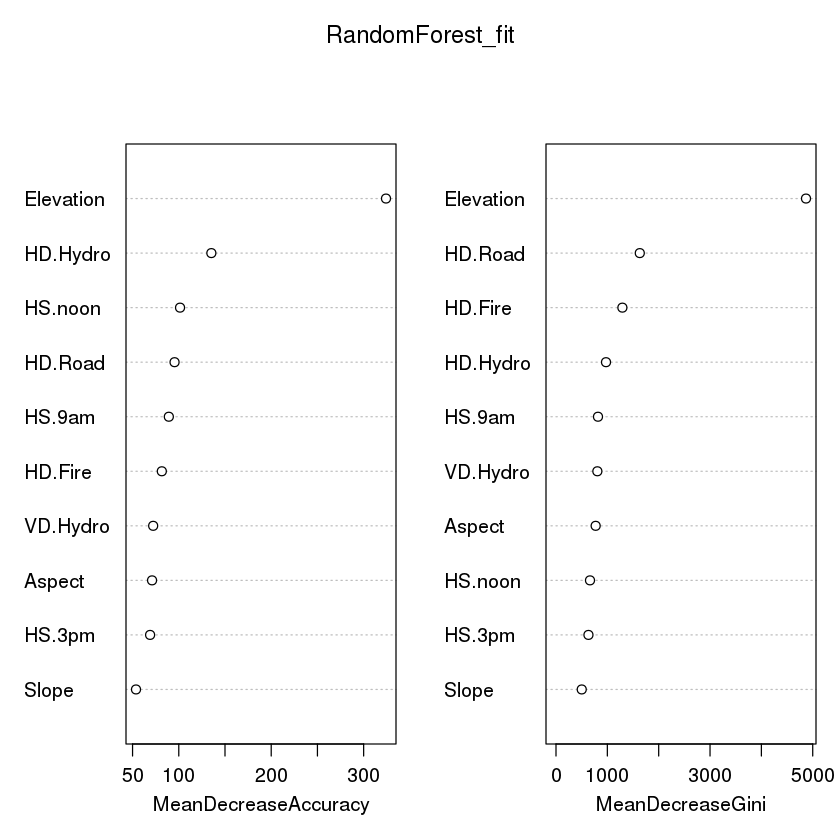

In [145]:
# Code for activity 7.3 continues here...

varImpPlot(RandomForest_fit)

#### Feature Importance

The feature importance of the 13 columns, with respect to Cover_Type variable is calculated above.
The table is presented below with importance of each variable calculated from the random forest importance function.
Additionally, you have plotted the most important variables.
Elevation is the top feature.

---
**Activity 8: ** Split the data into training and testing sets. Put 70% of data in "Forestcover_train" dataframe and rest in "Forestcover_test" dataframe. Use the seed as 100 to reproduce test results for evaluation. 

Testing set will be used to evaluate the predictive capability of the model.

In [146]:
# Your code for activity 8 goes here. 

# Be care ful in splitting the data. Set the seed as 100 for consistency in the results across everyone's notebooks. 
# use sample.split() function for splitting the data into 70% in training and rest in testing sets.
# Split the data on forest_cover$Cover_Type not on forest_cover.

library(caTools)
set.seed(100) # set.seed() will help us to reproduce the results.
split = sample.split(forest_cover, SplitRatio=0.7)

Forestcover_train = subset(forest_cover, split==TRUE)
Forestcover_test = subset(forest_cover, split==FALSE)


Using this importance information of the variables, choose to include between variables while fiting the model. Fit a classification model using LDA or SVC. Start with LDA. Cover_Type is character type. Convert the variable to factor with levels (1,2,3,4,5,6,7). 

In [147]:
class(Forestcover_train$Cover_Type)

[1] "character"

Convert the Cover_Type from character to factor type in both training and testing sets. Substitue the labels from names of Cover_Type to numbers (1,2,3,4,5,6,7) for fitting the model. 

Do the same thing for soilType. Convert the variable from character to factor type. Substitue soil type names with intergers 1:40.

In [148]:
Forestcover_train$Cover_Type <- factor(Forestcover_train$Cover_Type,
levels = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"),
labels = c(1,2,3,4,5,6,7))

Forestcover_test$Cover_Type <- factor(Forestcover_test$Cover_Type,
levels = c("1.SpruceFir","2.LodgepolePine","3.PonderosaPine","4.Cottonwood-Willow","5.Aspen","6.Douglas-fir","7.Krummholz"),
labels = c(1,2,3,4,5,6,7))


Forestcover_train$soilType <- factor(Forestcover_train$soilType,
levels = c('Cathedral','Vanet','Haploborolis','Ratake','Vanet1','Vanet2','Gothic','Supervisor',
             'Troutville','Bullwark1','Bullwark2','Legault','Catamount1','Pachic','unspecified',
             'Cryaquolis','Gateview','Rogert','Typic1','Typic2','Typic3','Leighcan1','Leighcan2',
             'Leighcan3','Leighcan4','Granile','Leighcan5','Leighcan6','Como1','Como2','Leighcan7',
             'Catamount2','Leighcan8','Cryorthents','Cryumbrepts','Bross','Rock','Leighcan9','Moran1',
             'Moran2'),
labels = c(1:40))

Forestcover_test$soilType <- factor(Forestcover_test$soilType,
levels = c('Cathedral','Vanet','Haploborolis','Ratake','Vanet1','Vanet2','Gothic','Supervisor',
             'Troutville','Bullwark1','Bullwark2','Legault','Catamount1','Pachic','unspecified',
             'Cryaquolis','Gateview','Rogert','Typic1','Typic2','Typic3','Leighcan1','Leighcan2',
             'Leighcan3','Leighcan4','Granile','Leighcan5','Leighcan6','Como1','Como2','Leighcan7',
             'Catamount2','Leighcan8','Cryorthents','Cryumbrepts','Bross','Rock','Leighcan9','Moran1',
             'Moran2'),
labels = c(1:40))

**Activity 8.a: ** Convert the variable wildernessArea into a factor with labels 1,2,3,4. Perform anova between variables 
wildernessArea and first 5 important features according to random forest importance.

In [149]:
# Your code for activity 8.a goes here.
na.omit(Forestcover_train$wildernessArea)

Forestcover_train$wildernessArea <- factor(Forestcover_train$wildernessArea,
levels = c('Rawah','Neota','ComanchePeak','CachePoudre'),
labels = c(1,2,3,4))

Forestcover_test$wildernessArea <- factor(Forestcover_test$wildernessArea,
levels = c('Rawah','Neota','ComanchePeak','CachePoudre'),
labels = c(1,2,3,4))


[1] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
    [5] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
    [9] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [13] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [17] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [21] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [25] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [29] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [33] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [37] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [41] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [45] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [49] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [53] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [57] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [61] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [65] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [69] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [73] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [77] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [81] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [85] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [89] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [93] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
   [97] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [101] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [105] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [109] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [113] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [117] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [121] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [125] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [129] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [133] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [137] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [141] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [145] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [149] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [153] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [157] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [161] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [165] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [169] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [173] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [177] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [181] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [185] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [189] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [193] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [197] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [201] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [205] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [209] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [213] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [217] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [221] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [225] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [229] "Rawah"        "Rawah"        "Rawah"        "Rawah"       
  [233] "Rawah"        "Rawah"        "Rawah"        "Rawah"

In [150]:
fit1 <- aov(Elevation ~ wildernessArea, data=Forestcover_train)
summary(fit1)

                  Df    Sum Sq   Mean Sq F value Pr(>F)    
wildernessArea     3 1.180e+09 393219859    6367 <2e-16 ***
Residuals      10464 6.462e+08     61755                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [151]:
fit2 <- aov(HD.Road ~ wildernessArea, data=Forestcover_train)
summary(fit2)

                  Df    Sum Sq   Mean Sq F value Pr(>F)    
wildernessArea     3 4.654e+09 1.551e+09    1181 <2e-16 ***
Residuals      10464 1.375e+10 1.314e+06                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [152]:
fit3 <- aov(HD.Fire ~ wildernessArea, data=Forestcover_train)
summary(fit3)

                  Df    Sum Sq   Mean Sq F value Pr(>F)    
wildernessArea     3 3.419e+09 1.140e+09    1271 <2e-16 ***
Residuals      10464 9.382e+09 8.966e+05                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [153]:
fit4 <- aov(HD.Hydro ~ wildernessArea, data=Forestcover_train)
summary(fit4)

                  Df    Sum Sq  Mean Sq F value Pr(>F)    
wildernessArea     3  30836854 10278951   252.7 <2e-16 ***
Residuals      10464 425616712    40674                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [154]:
fit5 <- aov(HS.9am ~ wildernessArea, data=Forestcover_train)
summary(fit5)

                  Df  Sum Sq Mean Sq F value Pr(>F)    
wildernessArea     3  319481  106494   119.1 <2e-16 ***
Residuals      10464 9354326     894                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Activity 8.b: ** Perform manova first 5 important features according to random forest importance against wildernessArea.

In [155]:
# Your code for activity 8.b goes here.
summary(manova(cbind(Elevation,HD.Road,HD.Fire,HD.Hydro,HS.9am) ~ wildernessArea, data=Forestcover_train), test="Hotelling-Lawley")

                  Df Hotelling-Lawley approx F num Df den Df    Pr(>F)    
wildernessArea     3           2.3343   1627.5     15  31376 < 2.2e-16 ***
Residuals      10464                                                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Activity 9: ** Fit a LDA model on Forestcover_train to predict Cover_Type using all independent variables except soilType. Name this model as Forestcover_lda.

In [156]:
# Your code for activity 9 goes here....

library(MASS)
Forestcover_lda = lda(Cover_Type ~. -soilType, data=Forestcover_train)
Forestcover_lda

Call:
lda(Cover_Type ~ . - soilType, data = Forestcover_train)

Prior probabilities of groups:
        1         2         3         4         5         6         7 
0.1444402 0.1398548 0.1424341 0.1447268 0.1442491 0.1419564 0.1423386 

Group means:
  Elevation   Aspect    Slope HD.Hydro VD.Hydro   HD.Road   HD.Fire   HS.9am
1  3131.532 157.1614 13.14021 272.6005 42.00265 2561.1819 2012.4716 212.3115
2  2927.248 152.9160 13.47404 284.1708 47.23702 2472.3607 2178.6537 213.9795
3  2401.001 174.3581 20.30852 212.3414 63.20724  963.8035  918.5781 202.6553
4  2225.144 138.0469 18.58614 106.6429 40.69109  918.0000  871.1050 228.2211
5  2789.458 138.2020 16.79139 210.2960 51.77417 1326.5073 1522.4907 223.4881
6  2426.145 181.7571 18.86878 160.8721 44.70727 1067.5303 1053.4502 193.6427
7  3364.011 152.3349 14.19732 348.1718 68.98121 2714.1584 2078.0054 217.1336
   HS.noon   HS.3pm wildernessArea2 wildernessArea3 wildernessArea4
1 223.2255 143.2130      0.08796296       0.4140212     0.0000000

#### Asses the model accuracy

**Activity 10: ** Predict the forest cover type on Forestcover_test using the model Forestcover_lda built above. Build a confusion matrix to asses the performance of the model on test set and find the accuracy of predictions. 

In [157]:
# Your code for Activity 10 goes here.

Forestcover_pred=predict(Forestcover_lda,Forestcover_test)

# Use a 2-way table or confusionMatrix function to generate confusion matrix 
forestconf <- table(Forestcover_pred$class, Forestcover_test$Cover_Type)
forestconf
# Find the accuracy of the model on test set.
print (paste("accuracy = ",sum(diag(forestconf))/length(Forestcover_pred$class)))

   
      1   2   3   4   5   6   7
  1 383 148   0   0   1   0  78
  2 100 267   4   0  71   2   0
  3   1   2 203  17   4  97   0
  4   0   5 176 605   0 136   0
  5  44 238  85   0 552 115   2
  6   1  14 201  23  22 324   0
  7 119  22   0   0   0   0 590

[1] "accuracy =  0.628546861564918"


**Activity 11: ** Fit a LDA model on Forestcover_train to predict Cover_Type using Elevation, HD.Hydro, HD.Road and HD.Fire. Name this model as Forestcover_lda1.

In [158]:
# Your code for Activity 11 goes here.
Forestcover_lda1 = lda(Cover_Type ~ Elevation + HD.Hydro + HD.Road + HD.Fire, data=Forestcover_train)
Forestcover_lda1

Call:
lda(Cover_Type ~ Elevation + HD.Hydro + HD.Road + HD.Fire, data = Forestcover_train)

Prior probabilities of groups:
        1         2         3         4         5         6         7 
0.1444402 0.1398548 0.1424341 0.1447268 0.1442491 0.1419564 0.1423386 

Group means:
  Elevation HD.Hydro   HD.Road   HD.Fire
1  3131.532 272.6005 2561.1819 2012.4716
2  2927.248 284.1708 2472.3607 2178.6537
3  2401.001 212.3414  963.8035  918.5781
4  2225.144 106.6429  918.0000  871.1050
5  2789.458 210.2960 1326.5073 1522.4907
6  2426.145 160.8721 1067.5303 1053.4502
7  3364.011 348.1718 2714.1584 2078.0054

Coefficients of linear discriminants:
                    LD1           LD2           LD3           LD4
Elevation -6.760040e-03 -0.0020924965  0.0004770120  0.0005374587
HD.Hydro   7.871746e-04  0.0009213581 -0.0039432219 -0.0034206300
HD.Road    3.654638e-05  0.0007591441 -0.0003464644  0.0005449081
HD.Fire   -1.223907e-04  0.0004159332  0.0006810076 -0.0007231958

Proportion of trace:
  

**Activity 12: ** Predict the forest cover type on Forestcover_test using the model Forestcover_lda1. Build a confusion matrix to asses the performance of the model on test set and find the accuracy of predictions. 

In [159]:
# Your code for Activity 12 goes here.
Forestcover_pred2=predict(Forestcover_lda1,Forestcover_test)

forestconf2 <- table(Forestcover_pred2$class, Forestcover_test$Cover_Type)
forestconf2

print (paste("accuracy = ",sum(diag(forestconf2))/length(Forestcover_pred2$class)))

   
      1   2   3   4   5   6   7
  1 345 139   0   0   0   0  87
  2 118 270  14   0  87   0   2
  3   0   3 181 107   9 117   0
  4   0   1 227 493   0 180   0
  5  51 223  71   0 530 122   0
  6   1  32 176  45  24 255   0
  7 133  28   0   0   0   0 581

[1] "accuracy =  0.570722269991402"


### SVM

**Activity 13: ** Fit a SVM model on Forestcover_train to predict Cover_Type using all independent variables. Use different non linear kernels like polynomial, radial, sigmoid, etc. to find the best fit. Name this model as forestcover_svmfit. 

In [160]:
#Your code for Activity 13 goes here.

library("e1071")
library(caret)
    
forestcover_svmfit <- svm(Cover_Type ~., data=Forestcover_train, kernel='radial', gamma=1, cost=1)
forestcover_svmfit

fc_pred <- predict(forestcover_svmfit, Forestcover_train)
confusionMatrix(fc_pred, Forestcover_train$Cover_Type)

#tried polynomial, radial and sigmoid. radial seems to perform the best.
#attempted to tune the model several times for a better performance, but the jupyterhub kernel kept breaking.


Call:
svm(formula = Cover_Type ~ ., data = Forestcover_train, kernel = "radial", 
    gamma = 1, cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  8202


Confusion Matrix and Statistics

          Reference
Prediction    1    2    3    4    5    6    7
         1 1452   31    0    0    2    0    7
         2   32 1372    1    0    5    0    0
         3    2   12 1343   13   14   62    0
         4    0    0   42 1486    0   29    0
         5   12   32    7    0 1480    6    0
         6    2   15   98   16    9 1389    0
         7   12    2    0    0    0    0 1483

Overall Statistics
                                          
               Accuracy : 0.9558          
                 95% CI : (0.9517, 0.9596)
    No Information Rate : 0.1447          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9484          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.9603   0.9372   0.9007   0.9809   0.9801   0.9347
Specificity            0.9955   0.9958   0

**Activity 14: ** Predict the forest cover type on Forestcover_test using the model Forestcover_svmfit. Build a confusion matrix to asses the performance of the model on test set and find the accuracy of predictions. 

In [164]:
# Your code for Activity 14 goes here.
fc_pred2 <- predict(forestcover_svmfit, Forestcover_test)
confusionMatrix(fc_pred2, Forestcover_test$Cover_Type)


Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7
         1 485 129   7   2   7   4  67
         2 131 472  19   0  41  14   3
         3   0  19 494  17  17  95   0
         4   0   1  53 614   0  27   0
         5  12  54   6   0 576   4   0
         6   2  17  90  12   9 530   0
         7  18   4   0   0   0   0 600

Overall Statistics
                                          
               Accuracy : 0.8106          
                 95% CI : (0.7991, 0.8218)
    No Information Rate : 0.1496          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7791          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.7485   0.6782   0.7384   0.9519   0.8862   0.7864
Specificity            0.9461   0.9474   0.9628   0.9798   0.9810   0.9673
Pos Pred Value         

**Activity 15: ** Fit a SVM model on Forestcover_train to predict Cover_Type using Elevation, HD.Hydro, HD.Road and HD.Fire and soilType. Name this model as Forestcover_svmfit1. 

In [165]:
# Your code for Activity 15 goes here.
forestcover_svmfit1 <- svm(Cover_Type ~ Elevation + HD.Hydro + HD.Road + HD.Fire + soilType, data=Forestcover_train, kernel='radial', gamma=1, cost=1)
forestcover_svmfit1


Call:
svm(formula = Cover_Type ~ Elevation + HD.Hydro + HD.Road + HD.Fire + 
    soilType, data = Forestcover_train, kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  6180


**Activity 16: ** Predict the forest cover type on Forestcover_test using the model Forestcover_svmfit1. Build a confusion matrix to asses the performance of the model on test set and find the accuracy of predictions. 

In [166]:
# Your code for Activity 16 goes here.
fc_pred3 <- predict(forestcover_svmfit1, Forestcover_test)
confusionMatrix(fc_pred3, Forestcover_test$Cover_Type)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7
         1 466 125   0   0   0   0  45
         2 116 422   0   0  28   1   1
         3   0  20 476  19  29 114   0
         4   0   0  58 620   0  34   0
         5  21  90   3   0 579   8   0
         6   1  32 132   6  14 517   0
         7  44   7   0   0   0   0 624

Overall Statistics
                                          
               Accuracy : 0.7962          
                 95% CI : (0.7843, 0.8077)
    No Information Rate : 0.1496          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7623          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.7191  0.60632   0.7115   0.9612   0.8908   0.7671
Specificity            0.9575  0.96309   0.9543   0.9770   0.9695   0.9535
Pos Pred Value         

# Save your notebook

## Use Git to : Add, Commit, and Push all your course work!